In [17]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.naive import NaiveForecaster
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from aeon.forecasting.arima import ARIMA

In [18]:
y = load_airline()

In [19]:
random_data = np.random.random((y.shape[0], 3))
cols = [f'X{i+1}' for i in range(random_data.shape[1])]
X = pd.DataFrame(data=random_data, columns=cols, index=y.index)
X.head()

,X1,X2,X3
Period,,,
1949-01,0.573395,0.034252,0.686306
1949-02,0.396687,0.679951,0.901113
1949-03,0.644836,0.338171,0.382435
1949-04,0.849970,0.953631,0.623559
1949-05,0.146216,0.949215,0.256016


In [20]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
X_train, X_test = temporal_train_test_split(X, test_size=36)

In [21]:
print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

(108,) (36,)
(108, 3) (36, 3)


In [22]:
fh = np.arange(1, 37)


In [23]:
from aeon.forecasting.compose import ForecastX
from aeon.forecasting.var import VAR

forecaster = ForecastX(  
    forecaster_X=VAR(),
    forecaster_y=ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12)),
)
forecaster.fit(y_train, X=X, fh=fh)  
# Works without X from the future of y!
y_pred = forecaster.predict(fh=fh)  

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

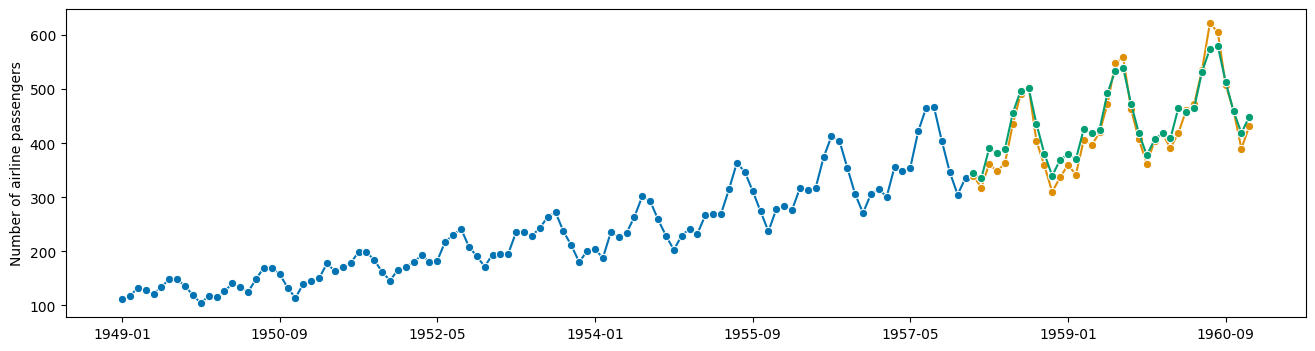

In [24]:
plot_series(y_train, y_test, y_pred)